## Baseline - Prophet
This is a baseline comparison on the covid data. This allows for the relative assessment of the Pycipio framework against that of Facebook Prophet

In [2]:
# import packages
from covid19dh import covid19
from datetime import date
from Get_covid_data import get_data
import pymc3 as pm
import pandas as pd 
import numpy as np 
import seaborn as sns
import arviz as az
import matplotlib.pyplot as plt
import os 
import theano
import random
from sklearn.preprocessing import MinMaxScaler
#import facebook prophet
from fbprophet import Prophet
from pandas import to_datetime
from fbprophet.plot import plot_plotly, plot_components_plotly
# import functions from fns file 
import fns as f

In [3]:
#Get data
data = get_data(level = 2, start = date(2019,1,1)) #can get more or less data here.
#group_by introduce lag (new infected from commulative)
data["new_infected"] = data.groupby(["administrative_area_level_2"])["confirmed"].diff()
data = data[data["new_infected"].notna()]
##Create subset from 1 state and prep columns for prophet
subset = data[data['administrative_area_level_2'].isin(["New York"])]
subset = subset[["date", "new_infected"]]
subset.columns = ['ds', 'y']

from pandas import to_datetime


Now to use prophet

In [35]:
# create and fit prophet object on the df
m = Prophet(changepoint_prior_scale=0.5)
m.fit(subset)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
#Make future preditions (30 days)
future = m.make_future_dataframe(periods=90)
future.tail()

,ds
518,2021-08-02
519,2021-08-03
520,2021-08-04
521,2021-08-05
522,2021-08-06


In [37]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
518,2021-08-02,-973.829889,-13949.894617,11359.929661
519,2021-08-03,-920.445374,-14003.900676,11402.383641
520,2021-08-04,-476.206109,-13470.167756,12074.311663
521,2021-08-05,-150.216447,-13853.452713,12741.817781
522,2021-08-06,-3.449247,-14168.396476,12946.718994


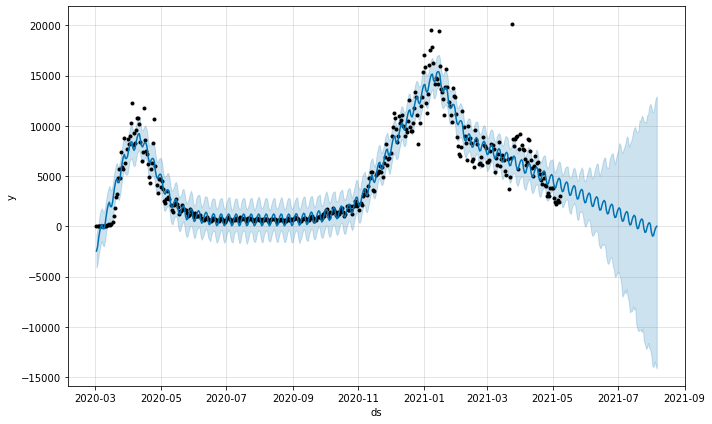

In [38]:
m.plot(forecast);


### PSSSST! Mikkel likes an interactive plot!

In [16]:

plot_plotly(m, forecast)

We can see the component of the model:

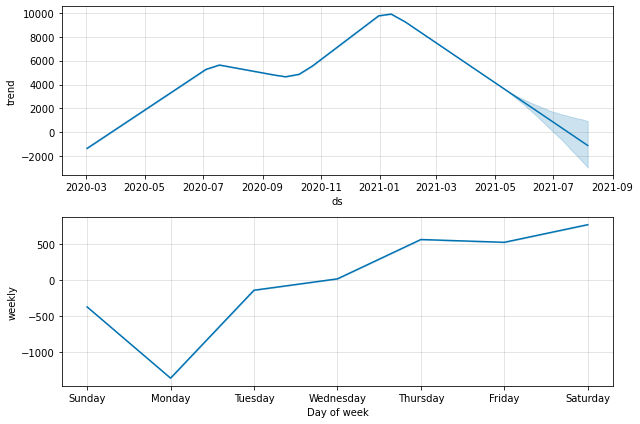

In [25]:
m.plot_components(forecast);


### Clearly, prophet does a bad job accounting for the data, when you apply it right out the box. However, a fair comparison makes use of proper tuning of the prophet model. 

##HOWEVER! 
Apparently, prophet is old news. "Neural prophet is where it is at